# Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
import os

In [14]:
# Read data from csv and put into a dataframe
folder = '../../archive/Datasets/'
raw_data_1 = pd.read_csv(folder +'2000-01.csv')
raw_data_2 = pd.read_csv(folder +'2001-02.csv')
raw_data_3 = pd.read_csv(folder +'2002-03.csv')
raw_data_4 = pd.read_csv(folder +'2003-04.csv')
raw_data_5 = pd.read_csv(folder +'2004-05.csv')
raw_data_6 = pd.read_csv(folder +'2005-06.csv')
raw_data_7 = pd.read_csv(folder +'2006-07.csv')
raw_data_8 = pd.read_csv(folder +'2007-08.csv')
raw_data_9 = pd.read_csv(folder +'2008-09.csv')
raw_data_10 = pd.read_csv(folder +'2009-10.csv')
raw_data_11 = pd.read_csv(folder +'2010-11.csv')
raw_data_12 = pd.read_csv(folder +'2011-12.csv')
raw_data_13 = pd.read_csv(folder +'2012-13.csv')
raw_data_14 = pd.read_csv(folder +'2013-14.csv')
raw_data_15 = pd.read_csv(folder +'2014-15.csv')
raw_data_16 = pd.read_csv(folder +'2015-16.csv')
raw_data_17 = pd.read_csv(folder +'2016-17.csv')
raw_data_18 = pd.read_csv(folder +'2017-18.csv')
# Do not have all 380 games in these
# raw_data_19 = pd.read_csv(folder +'2018-19.csv')
# raw_data_20 = pd.read_csv(folder +'2019-20.csv')
raw_data_21 = pd.read_csv(folder +'2020-21.csv')
raw_data_22 = pd.read_csv(folder +'2021-22.csv')



In [15]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statstics_1 = raw_data_1[columns_req]
playing_statstics_2 = raw_data_2[columns_req]
playing_statstics_3 = raw_data_3[columns_req]
playing_statstics_4 = raw_data_4[columns_req]
playing_statstics_5 = raw_data_5[columns_req]
playing_statstics_6 = raw_data_6[columns_req]
playing_statstics_7 = raw_data_7[columns_req]
playing_statstics_8 = raw_data_8[columns_req]
playing_statstics_9 = raw_data_9[columns_req]
playing_statstics_10 = raw_data_10[columns_req]
playing_statstics_11 = raw_data_11[columns_req]
playing_statstics_12 = raw_data_12[columns_req]
playing_statstics_13 = raw_data_13[columns_req]
playing_statstics_14 = raw_data_14[columns_req]
playing_statstics_15 = raw_data_15[columns_req]
playing_statstics_16 = raw_data_16[columns_req]
playing_statstics_17 = raw_data_17[columns_req]
playing_statstics_18 = raw_data_18[columns_req]
# playing_statstics_19 = raw_data_19[columns_req]
# playing_statstics_20 = raw_data_20[columns_req]
playing_statstics_21 = raw_data_21[columns_req]
playing_statstics_22 = raw_data_22[columns_req]

print(playing_statstics_1.head())


       Date  HomeTeam       AwayTeam  FTHG  FTAG FTR
0  19/08/00  Charlton       Man City     4     0   H
1  19/08/00   Chelsea       West Ham     4     2   H
2  19/08/00  Coventry  Middlesbrough     1     3   A
3  19/08/00     Derby    Southampton     2     2   D
4  19/08/00     Leeds        Everton     2     0   H


# Get the goals scored and conceded at the end of each matchweek, arranged by teams and matchweek

In [17]:
# Get goals scored agg by the teams and matchweek, accumulates goals for each week 
def get_goals_scored_agg(playing_statstics):
    # create a dictionary with team names as keys
    teams = {}
    for team in playing_statstics['HomeTeam'].unique():
        teams[team] = []

    # the value corresponding to keys is a list containing the match location
    for i in range(len(playing_statstics)):
        HTGS = playing_statstics.iloc[i]['FTHG']
        ATGS = playing_statstics.iloc[i]['FTAG']
        teams[playing_statstics.iloc[i].HomeTeam].append(HTGS)
        teams[playing_statstics.iloc[i].AwayTeam].append(ATGS)

    # create a dataframe with the goals scored where rows are teams and cols are matchweek
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0

    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

# 1. Goals per game (more stable)
def get_goals_scored_per_game(playing_statstics):
    teams = {}
    for team in playing_statstics['HomeTeam'].unique():
        teams[team] = []

    for i in range(len(playing_statstics)):
        HTGS = playing_statstics.iloc[i]['FTHG']
        ATGS = playing_statstics.iloc[i]['FTAG']
        teams[playing_statstics.iloc[i].HomeTeam].append(HTGS)
        teams[playing_statstics.iloc[i].AwayTeam].append(ATGS)

    GoalsScored = pd.DataFrame(data=teams, index=[i for i in range(1,39)]).T
    
    return GoalsScored

# Accumulated goals conceded by the teams and matchweek
def get_goals_conceded_agg(playing_statstics):
    teams = {}
    for team in playing_statstics['HomeTeam'].unique():
        teams[team] = []

    for i in range(len(playing_statstics)):
        HTGC = playing_statstics.iloc[i]['FTAG']
        ATGC = playing_statstics.iloc[i]['FTHG']
        teams[playing_statstics.iloc[i].HomeTeam].append(HTGC)
        teams[playing_statstics.iloc[i].AwayTeam].append(ATGC)

    GoalsConceded = pd.DataFrame(data=teams, index=[i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

# each weeks goals conceted by teams
def get_goals_conceded_per_game(playing_statstics):
    teams = {}
    for team in playing_statstics['HomeTeam'].unique():
        teams[team] = []

    for i in range(len(playing_statstics)):
        HTGC = playing_statstics.iloc[i]['FTAG']
        ATGC = playing_statstics.iloc[i]['FTHG']
        teams[playing_statstics.iloc[i].HomeTeam].append(HTGC)
        teams[playing_statstics.iloc[i].AwayTeam].append(ATGC)

    GoalsConceded = pd.DataFrame(data=teams, index=[i for i in range(1,39)]).T
    
    return GoalsConceded

# gets the game season stats for each matchweek (how many scored/conceded till that point)
def get_gss(playing_statstics):
    GC = get_goals_conceded_agg(playing_statstics)
    GS = get_goals_scored_agg(playing_statstics)
    
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    # 380 total matches in a season
    for i in range(380):
        ht = playing_statstics.iloc[i].HomeTeam
        at = playing_statstics.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht, j])
        ATGS.append(GS.loc[at, j])
        HTGC.append(GC.loc[ht, j])
        ATGC.append(GC.loc[at, j])
        if((i + 1) % 10 == 0):
            j += 1
    playing_statstics['HTGS'] = HTGS
    playing_statstics['ATGS'] = ATGS
    playing_statstics['HTGC'] = HTGC
    playing_statstics['ATGC'] = ATGC

    return playing_statstics


In [18]:
# just to make sure it works 
# print("goals scored agg")
# print(get_goals_scored_agg(playing_statstics_1).head())
# print("goals per game")
# print(get_goals_scored_per_game(playing_statstics_1).head())
# print("goals conceded agg")
# print(get_goals_conceded_agg(playing_statstics_1).head())
# print("goals conceded per game")
# print(get_goals_conceded_per_game(playing_statstics_1).head())
print(get_gss(playing_statstics_1))

         Date       HomeTeam       AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    19/08/00       Charlton       Man City     4     0   H     0     0     0   
1    19/08/00        Chelsea       West Ham     4     2   H     0     0     0   
2    19/08/00       Coventry  Middlesbrough     1     3   A     0     0     0   
3    19/08/00          Derby    Southampton     2     2   D     0     0     0   
4    19/08/00          Leeds        Everton     2     0   H     0     0     0   
..        ...            ...            ...   ...   ...  ..   ...   ...   ...   
375  19/05/01       Man City        Chelsea     1     2   A    40    66    63   
376  19/05/01  Middlesbrough       West Ham     2     1   H    42    44    43   
377  19/05/01      Newcastle    Aston Villa     3     0   H    41    46    50   
378  19/05/01    Southampton        Arsenal     3     2   H    37    61    46   
379  19/05/01      Tottenham     Man United     3     1   H    44    78    53   

     ATGC  
0       0  
1  

/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/1036294744.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['HTGS'] = HTGS
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/1036294744.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['ATGS'] = ATGS
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/1036294744.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [19]:
# Add goal statistics to each season
playing_statstics_1 = get_gss(playing_statstics_1)
playing_statstics_2 = get_gss(playing_statstics_2)
playing_statstics_3 = get_gss(playing_statstics_3)
playing_statstics_4 = get_gss(playing_statstics_4)
playing_statstics_5 = get_gss(playing_statstics_5)
playing_statstics_6 = get_gss(playing_statstics_6)
playing_statstics_7 = get_gss(playing_statstics_7)
playing_statstics_8 = get_gss(playing_statstics_8)
playing_statstics_9 = get_gss(playing_statstics_9)
playing_statstics_10 = get_gss(playing_statstics_10)
playing_statstics_11 = get_gss(playing_statstics_11)
playing_statstics_12 = get_gss(playing_statstics_12)
playing_statstics_13 = get_gss(playing_statstics_13)
playing_statstics_14 = get_gss(playing_statstics_14)
playing_statstics_15 = get_gss(playing_statstics_15)
playing_statstics_16 = get_gss(playing_statstics_16)
playing_statstics_17 = get_gss(playing_statstics_17)
playing_statstics_18 = get_gss(playing_statstics_18)
playing_statstics_21 = get_gss(playing_statstics_21)
playing_statstics_22 = get_gss(playing_statstics_22)

/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/1036294744.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['HTGS'] = HTGS
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/1036294744.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['ATGS'] = ATGS
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/1036294744.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [20]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

def get_cuml_points(matches):
    matches_points = matches.applymap(get_points)
    for i in range(2,39):
        matches_points[i] = matches_points[i] + matches_points[i-1]

    matches_points.insert(column=0, loc=0, value=[0*i for i in range(20)])
    return matches_points

def get_matches(playing_statstics):
    # Create a dcitionary with team names as keys
    teams = {}
    for i in playing_statstics['HomeTeam'].unique():
        teams[i] = []

    #The value corresponding to keys is a list containing the match result
    for i in range(len(playing_statstics)):
        if playing_statstics.iloc[i].FTR == 'H':
            teams[playing_statstics.iloc[i].HomeTeam].append('W')
            teams[playing_statstics.iloc[i].AwayTeam].append('L')
        elif playing_statstics.iloc[i].FTR == 'A':
            teams[playing_statstics.iloc[i].AwayTeam].append('W')
            teams[playing_statstics.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_statstics.iloc[i].HomeTeam].append('D')
            teams[playing_statstics.iloc[i].AwayTeam].append('D')

    # Create a dataframe with the matches where rows are teams and cols are matchweek
    Matches = pd.DataFrame(data=teams, index=[i for i in range(1,39)]).T
    return Matches
    
def get_agg_points(playing_statstics):
    matches = get_matches(playing_statstics)
    cum_points = get_cuml_points(matches)
    j = 0
    HT_PTS = []
    AT_PTS = []
    
    for i in range(380):
        ht = playing_statstics.iloc[i].HomeTeam
        at = playing_statstics.iloc[i].AwayTeam
        HT_PTS.append(cum_points.loc[ht, j])
        AT_PTS.append(cum_points.loc[at, j])
        if((i + 1) % 10 == 0):
            j += 1

    playing_statstics['HTP'] = HT_PTS
    playing_statstics['ATP'] = AT_PTS

    return playing_statstics 

In [21]:
# shows each teams W/D/L for each matchweek row = team, col = matchweek
#print(get_matches(playing_statstics_1).head())
# Shows the cumulative points for each team at the end of each matchweek
print(get_cuml_points(get_matches(playing_statstics_1)).head())
# Shows the points for each team at the end of the season
print(get_cuml_points(get_matches(playing_statstics_1))[38])
# Adds HTP and ATP  (cumulative points) before this match for each match week
print(get_agg_points(playing_statstics_1).head())


          0   1   2   3   4   5   6   7   8   9   ...  29  30  31  32  33  34  \
Charlton   0   3   3   3   4   5   8  11  12  12  ...  42  42  45  45  45  46   
Chelsea    0   3   3   4   5   6   6   7  10  10  ...  42  45  48  51  54  54   
Coventry   0   0   3   6   6   7   7   7   8  11  ...  24  24  27  30  30  33   
Derby      0   1   1   2   3   4   4   5   5   5  ...  34  35  35  35  35  38   
Leeds      0   3   6   6   7   7   8  11  14  14  ...  44  47  50  53  56  59   

          35  36  37  38  
Charlton  49  52  52  52  
Chelsea   54  57  58  61  
Coventry  33  33  33  34  
Derby     38  38  41  42  
Leeds     62  62  65  68  

[5 rows x 39 columns]
Charlton         52
Chelsea          61
Coventry         34
Derby            42
Leeds            68
Leicester        48
Liverpool        69
Sunderland       57
Tottenham        49
Man United       80
Arsenal          70
Bradford         26
Ipswich          66
Middlesbrough    42
Everton          42
Man City         34
Newcastl

/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/3650882913.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matches_points = matches.applymap(get_points)
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/3650882913.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matches_points = matches.applymap(get_points)
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/3650882913.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matches_points = matches.applymap(get_points)
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/3650882913.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [22]:
playing_statstics_1 = get_agg_points(playing_statstics_1)
playing_statstics_2 = get_agg_points(playing_statstics_2)
playing_statstics_3 = get_agg_points(playing_statstics_3)
playing_statstics_4 = get_agg_points(playing_statstics_4)
playing_statstics_5 = get_agg_points(playing_statstics_5)
playing_statstics_6 = get_agg_points(playing_statstics_6)
playing_statstics_7 = get_agg_points(playing_statstics_7)
playing_statstics_8 = get_agg_points(playing_statstics_8)
playing_statstics_9 = get_agg_points(playing_statstics_9)
playing_statstics_10 = get_agg_points(playing_statstics_10)
playing_statstics_11 = get_agg_points(playing_statstics_11)
playing_statstics_12 = get_agg_points(playing_statstics_12)
playing_statstics_13 = get_agg_points(playing_statstics_13)
playing_statstics_14 = get_agg_points(playing_statstics_14)
playing_statstics_15 = get_agg_points(playing_statstics_15)
playing_statstics_16 = get_agg_points(playing_statstics_16)
playing_statstics_17 = get_agg_points(playing_statstics_17)
playing_statstics_18 = get_agg_points(playing_statstics_18)
# playing_statstics_19 = get_agg_points(playing_statstics_19)
# playing_statstics_20 = get_agg_points(playing_statstics_20)
playing_statstics_21 = get_agg_points(playing_statstics_21)
playing_statstics_22 = get_agg_points(playing_statstics_22)

/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/3650882913.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matches_points = matches.applymap(get_points)
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/3650882913.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['HTP'] = HT_PTS
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/3650882913.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing

# Get Team Form
4. add_form_df() - Creates Multiple Form Features
Calls add_form() for 1, 2, 3, and 4 matches back, creating columns:
HM1, AM1 = each team's result from their last match
HM2, AM2 = each team's result from 2 matches ago
HM3, AM3 = 3 matches ago
HM4, AM4 = 4 matches ago

In [23]:
def get_form(playing_statstics, num):
    form = get_matches(playing_statstics)
    form_final = form.copy()
    for i in range(num,38):
        form_final[i] = ' '
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1
          
    return form_final

def add_form(playing_statstics, num):
    form = get_form(playing_statstics, num)
    h = ['M' for i in range(num * 10)] # since form is not available for n MW (n *10)
    a = ['M' for i in range(num * 10)]
    j = num
    for i in range((num * 10), 380):
        ht = playing_statstics.iloc[i].HomeTeam
        at = playing_statstics.iloc[i].AwayTeam
       
        past = form.loc[ht][j] # get past n results

        h.append(past[num-1]) # 0 index, is most recent

        past = form.loc[at][j] # get past n results

        a.append(past[num-1]) # 0 index, is most recent

        if((i + 1) % 10 == 0):
            j += 1

    playing_statstics['HM' + str(num)] = h
    playing_statstics['AM' + str(num)] = a
    
    return playing_statstics


def add_form_df(playing_statstics):
    for i in range(1,6):
        playing_statstics = add_form(playing_statstics, i)
    return playing_statstics





In [24]:
print(add_form_df(playing_statstics_1))

/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['HM' + str(num)] = h
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['AM' + str(num)] = a
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

         Date       HomeTeam       AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    19/08/00       Charlton       Man City     4     0   H     0     0     0   
1    19/08/00        Chelsea       West Ham     4     2   H     0     0     0   
2    19/08/00       Coventry  Middlesbrough     1     3   A     0     0     0   
3    19/08/00          Derby    Southampton     2     2   D     0     0     0   
4    19/08/00          Leeds        Everton     2     0   H     0     0     0   
..        ...            ...            ...   ...   ...  ..   ...   ...   ...   
375  19/05/01       Man City        Chelsea     1     2   A    40    66    63   
376  19/05/01  Middlesbrough       West Ham     2     1   H    42    44    43   
377  19/05/01      Newcastle    Aston Villa     3     0   H    41    46    50   
378  19/05/01    Southampton        Arsenal     3     2   H    37    61    46   
379  19/05/01      Tottenham     Man United     3     1   H    44    78    53   

     ATGC  ...  HM1  AM1 HM

/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['HM' + str(num)] = h
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['AM' + str(num)] = a


In [25]:
playing_statstics_1 = add_form_df(playing_statstics_1)
playing_statstics_2 = add_form_df(playing_statstics_2)
playing_statstics_3 = add_form_df(playing_statstics_3)
playing_statstics_4 = add_form_df(playing_statstics_4)
playing_statstics_5 = add_form_df(playing_statstics_5)
playing_statstics_6 = add_form_df(playing_statstics_6)
playing_statstics_7 = add_form_df(playing_statstics_7)
playing_statstics_8 = add_form_df(playing_statstics_8)
playing_statstics_9 = add_form_df(playing_statstics_9)
playing_statstics_10 = add_form_df(playing_statstics_10)
playing_statstics_11 = add_form_df(playing_statstics_11)
playing_statstics_12 = add_form_df(playing_statstics_12)
playing_statstics_13 = add_form_df(playing_statstics_13)
playing_statstics_14 = add_form_df(playing_statstics_14)
playing_statstics_15 = add_form_df(playing_statstics_15)
playing_statstics_16 = add_form_df(playing_statstics_16)
playing_statstics_17 = add_form_df(playing_statstics_17)
playing_statstics_18 = add_form_df(playing_statstics_18)
# playing_statstics_19 = add_form_df(playing_statstics_19)
# playing_statstics_20 = add_form_df(playing_statstics_20)
playing_statstics_21 = add_form_df(playing_statstics_21)
playing_statstics_22 = add_form_df(playing_statstics_22)

/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['HM' + str(num)] = h
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_statstics['AM' + str(num)] = a
/var/folders/bg/_sdgb16s7sn49jmvbrfmbwlw0000gn/T/ipykernel_24066/2967495289.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [27]:
# Rearrange columns
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]
playing_statstics_1 = playing_statstics_1[cols]
playing_statstics_2 = playing_statstics_2[cols]
playing_statstics_3 = playing_statstics_3[cols]
playing_statstics_4 = playing_statstics_4[cols]
playing_statstics_5 = playing_statstics_5[cols]
playing_statstics_6 = playing_statstics_6[cols]
playing_statstics_7 = playing_statstics_7[cols]
playing_statstics_8 = playing_statstics_8[cols]
playing_statstics_9 = playing_statstics_9[cols]
playing_statstics_10 = playing_statstics_10[cols]
playing_statstics_11 = playing_statstics_11[cols]
playing_statstics_12 = playing_statstics_12[cols]
playing_statstics_13 = playing_statstics_13[cols]
playing_statstics_14 = playing_statstics_14[cols]
playing_statstics_15 = playing_statstics_15[cols]
playing_statstics_16 = playing_statstics_16[cols]
playing_statstics_17 = playing_statstics_17[cols]
playing_statstics_18 = playing_statstics_18[cols]
# playing_statstics_19 = playing_statstics_19[cols]
# playing_statstics_20 = playing_statstics_20[cols]
playing_statstics_21 = playing_statstics_21[cols]
playing_statstics_22 = playing_statstics_22[cols]



# Get Matchweek into the data frame 

In [28]:
def get_match_week(playing_statstics):
    j = 1
    match_week = []
    for i in range(380):
        match_week.append(j)
        if((i + 1) % 10 == 0):
            j += 1
    playing_statstics['MW'] = match_week
    return playing_statstics

In [29]:
playing_statstics_1 = get_match_week(playing_statstics_1)
playing_statstics_2 = get_match_week(playing_statstics_2)
playing_statstics_3 = get_match_week(playing_statstics_3)
playing_statstics_4 = get_match_week(playing_statstics_4)
playing_statstics_5 = get_match_week(playing_statstics_5)
playing_statstics_6 = get_match_week(playing_statstics_6)
playing_statstics_7 = get_match_week(playing_statstics_7)
playing_statstics_8 = get_match_week(playing_statstics_8)
playing_statstics_9 = get_match_week(playing_statstics_9)
playing_statstics_10 = get_match_week(playing_statstics_10)
playing_statstics_11 = get_match_week(playing_statstics_11)
playing_statstics_12 = get_match_week(playing_statstics_12)
playing_statstics_13 = get_match_week(playing_statstics_13)
playing_statstics_14 = get_match_week(playing_statstics_14)
playing_statstics_15 = get_match_week(playing_statstics_15)
playing_statstics_16 = get_match_week(playing_statstics_16)
playing_statstics_17 = get_match_week(playing_statstics_17)
playing_statstics_18 = get_match_week(playing_statstics_18)
# playing_statstics_19 = get_match_week(playing_statstics_19)
# playing_statstics_20 = get_match_week(playing_statstics_20)
playing_statstics_21 = get_match_week(playing_statstics_21)
playing_statstics_22 = get_match_week(playing_statstics_22)

# Final Dataframe, concat all data frames together

In [30]:
playing_statstics_all = pd.concat([playing_statstics_1, playing_statstics_2, playing_statstics_3, playing_statstics_4, playing_statstics_5, playing_statstics_6, playing_statstics_7, playing_statstics_8, playing_statstics_9, playing_statstics_10, playing_statstics_11, playing_statstics_12, playing_statstics_13, playing_statstics_14, playing_statstics_15, playing_statstics_16, playing_statstics_17, playing_statstics_18, playing_statstics_21, playing_statstics_22], ignore_index=True)

# Gets the form points
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_statstics_all['HTFormPtsStr'] = playing_statstics_all['HM1'] + playing_statstics_all['HM2'] + playing_statstics_all['HM3'] + playing_statstics_all['HM4'] + playing_statstics_all['HM5']
playing_statstics_all['ATFormPtsStr'] = playing_statstics_all['AM1'] + playing_statstics_all['AM2'] + playing_statstics_all['AM3'] + playing_statstics_all['AM4'] + playing_statstics_all['AM5']

playing_statstics_all['HTFormPts'] = playing_statstics_all['HTFormPtsStr'].apply(get_form_points)
playing_statstics_all['ATFormPts'] = playing_statstics_all['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0

def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_statstics_all['HTWinStreak3'] = playing_statstics_all['HTFormPtsStr'].apply(get_3game_ws)
playing_statstics_all['HTWinStreak5'] = playing_statstics_all['HTFormPtsStr'].apply(get_5game_ws)
playing_statstics_all['HTLossStreak3'] = playing_statstics_all['HTFormPtsStr'].apply(get_3game_ls)
playing_statstics_all['HTLossStreak5'] = playing_statstics_all['HTFormPtsStr'].apply(get_5game_ls)

playing_statstics_all['ATWinStreak3'] = playing_statstics_all['ATFormPtsStr'].apply(get_3game_ws)
playing_statstics_all['ATWinStreak5'] = playing_statstics_all['ATFormPtsStr'].apply(get_5game_ws)
playing_statstics_all['ATLossStreak3'] = playing_statstics_all['ATFormPtsStr'].apply(get_3game_ls)
playing_statstics_all['ATLossStreak5'] = playing_statstics_all['ATFormPtsStr'].apply(get_5game_ls)

playing_statstics_all.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [31]:
# Get Goal Difference
playing_statstics_all['HTGD'] = playing_statstics_all['HTGS'] - playing_statstics_all['HTGC']
playing_statstics_all['ATGD'] = playing_statstics_all['ATGS'] - playing_statstics_all['ATGC']

# Get Points Difference
playing_statstics_all['DiffPts'] = playing_statstics_all['HTP'] - playing_statstics_all['ATP']
playing_statstics_all['DiffFormPts'] = playing_statstics_all['HTFormPts'] - playing_statstics_all['ATFormPts']

In [32]:
# Scale DiffPts, DiffFormPts, HTGD, ATGD
cols = ['HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'HTP', 'ATP']
playing_statstics_all.MW = playing_statstics_all.MW.astype(float)

for col in cols:
    playing_statstics_all[col] = playing_statstics_all[col] / playing_statstics_all.MW

In [33]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'

playing_statstics_all['FTR'] = playing_statstics_all['FTR'].apply(only_hw)

playing_stat_test = playing_statstics_all[5700:]
print(playing_stat_test.head())

          Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
5700  08/08/15  Bournemouth  Aston Villa     0     1  NH     0     0     0   
5701  08/08/15      Chelsea      Swansea     2     2  NH     0     0     0   
5702  08/08/15      Everton      Watford     2     2  NH     0     0     0   
5703  08/08/15    Leicester   Sunderland     4     2   H     0     0     0   
5704  08/08/15   Man United    Tottenham     1     0   H     0     0     0   

      ATGC  ...  HTLossStreak3  HTLossStreak5 ATWinStreak3 ATWinStreak5  \
5700     0  ...              0              0            0            0   
5701     0  ...              0              0            0            0   
5702     0  ...              0              0            0            0   
5703     0  ...              0              0            0            0   
5704     0  ...              0              0            0            0   

     ATLossStreak3 ATLossStreak5 HTGD ATGD DiffPts DiffFormPts  
5700           

In [34]:
playing_statstics_all.to_csv('final_dataset.csv')
playing_stat_test.to_csv ('test_set.csv')
dataset = pd.read_csv('final_data.csv')

dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPtrs,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0


In [35]:
dataset.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts',
       'DiffFormPtrs', 'DiffFormPts'],
      dtype='object')

<Axes: >

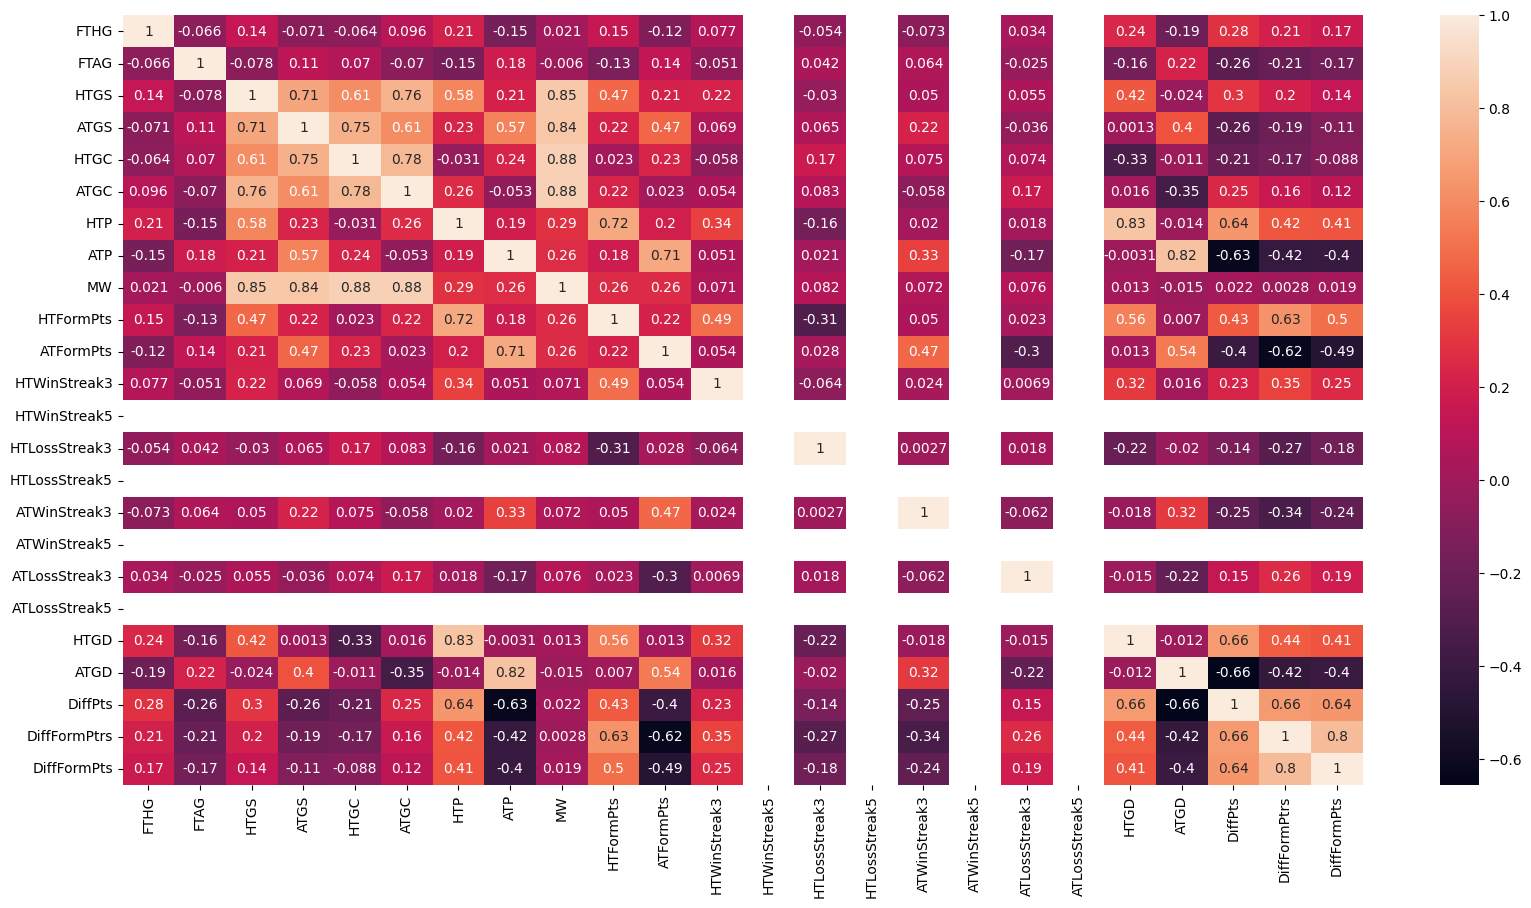

In [36]:
numeric_df = dataset.select_dtypes(include='number')

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(), annot=True)

In [37]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
    
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

dataset2.keys()

Index(['FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD',
       'ATGD', 'DiffFormPtrs', 'DiffFormPts'],
      dtype='object')

In [38]:
dataset2.head(10)

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPtrs,DiffFormPts
0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
5,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
6,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
8,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0
9,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0,0.0


In [39]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 7600
Number of features: 12
Number of matches won by home team: 3483
Win rate of home team: 45.83%


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

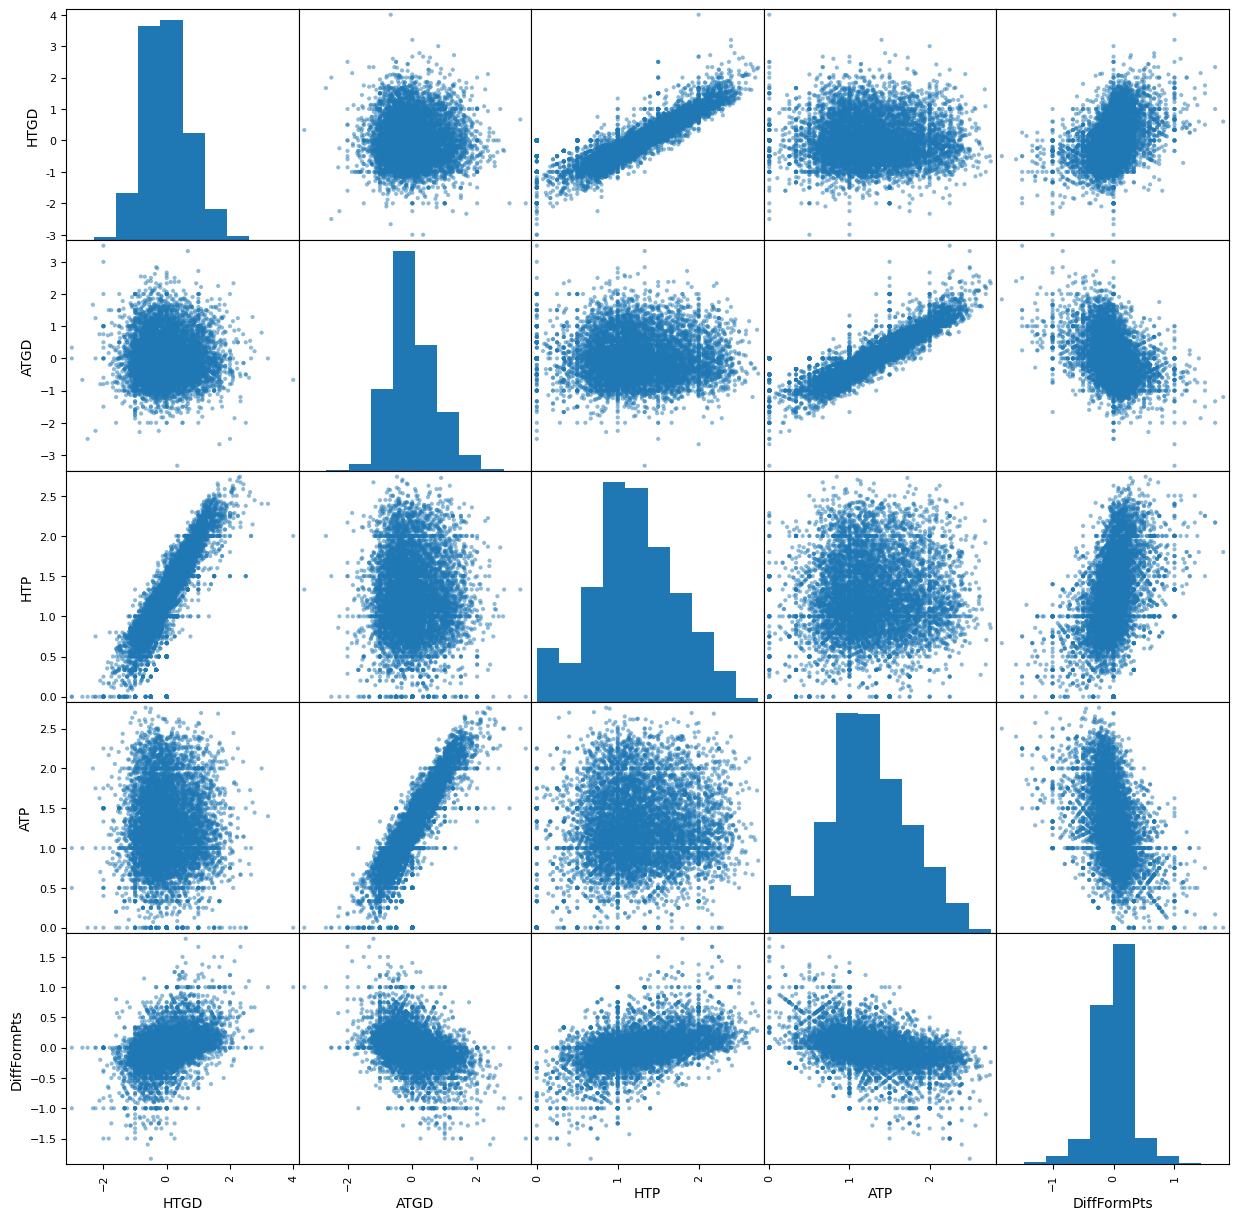

In [40]:


# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))



In [41]:


#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'], axis=1)

y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts categorical variables into dummy variables. '''
    
    output = pd.DataFrame(index=X.index)

    for col, col_data in X.items():
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
        
        output = output.join(col_data)

    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (26 total features):
['HTP', 'ATP', 'HM1_ ', 'HM1_M', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_ ', 'AM1_M', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPtrs', 'DiffFormPts']


In [42]:
X_all.head(10)

,HTP,ATP,HM1_,HM1_M,HM2_D,HM2_L,HM2_M,HM2_W,HM3_D,HM3_L,...,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPtrs,DiffFormPts
0,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
1,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
2,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
3,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
4,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
5,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
6,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
7,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
8,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0
9,-2.2688,-2.328014,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,0.012779,-0.01953,0,0.0


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode y_all
le = LabelEncoder()
y_all_encoded = le.fit_transform(y_all)      # Now labels are 0, 1, 2

# Split using the encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    X_all, 
    y_all_encoded,
    test_size=0.3,
    random_state=2,
    stratify=y_all_encoded
)

In [44]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
Y_pred = classifier.predict(X_test)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

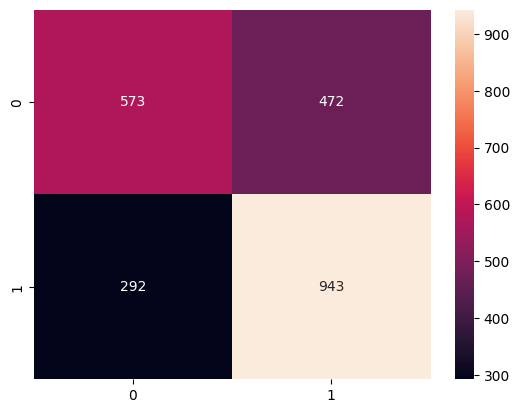

In [47]:
sns.heatmap(cm, annot=True,fmt='d')

In [48]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60      1045
           1       0.67      0.76      0.71      1235

    accuracy                           0.66      2280
   macro avg       0.66      0.66      0.66      2280
weighted avg       0.66      0.66      0.66      2280



In [49]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [50]:
#predicting result
Y_pred = classifier.predict(X_test)

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

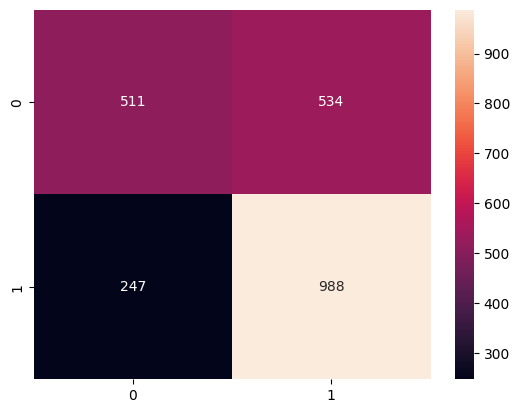

In [52]:
sns.heatmap(cm, annot=True, fmt='d')

In [53]:
print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.67      0.49      0.57      1045
           1       0.65      0.80      0.72      1235

    accuracy                           0.66      2280
   macro avg       0.66      0.64      0.64      2280
weighted avg       0.66      0.66      0.65      2280



In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [54]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

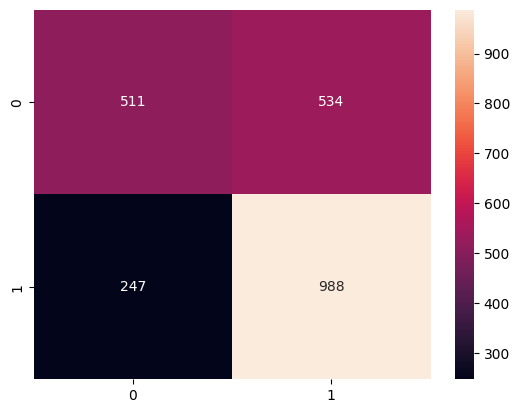

In [56]:
sns.heatmap(cm, annot=True,fmt='d')

In [57]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57      1045
           1       0.65      0.80      0.72      1235

    accuracy                           0.66      2280
   macro avg       0.66      0.64      0.64      2280
weighted avg       0.66      0.66      0.65      2280



In [ ]:
print(le.classes_)

['H' 'NH']


# Random Forest Implementation


In [ ]:
# Before Hyper parameter tuning
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

Y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

Text(0.5, 23.52222222222222, 'Predicted')

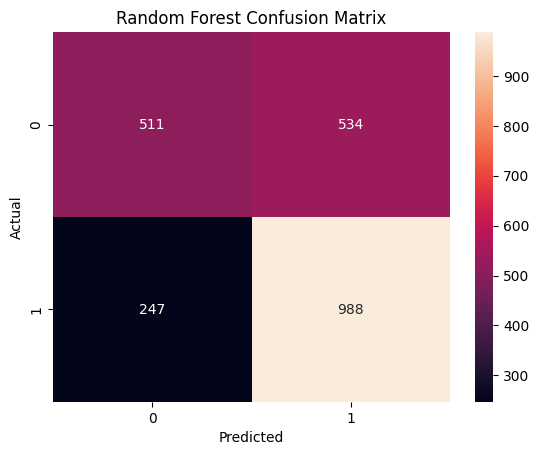

In [61]:
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [62]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57      1045
           1       0.65      0.80      0.72      1235

    accuracy                           0.66      2280
   macro avg       0.66      0.64      0.64      2280
weighted avg       0.66      0.66      0.65      2280



In [ ]:
## Small hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Smaller parameter grid for faster testing
parameters = { 
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

f1_scorer = make_scorer(f1_score, pos_label=0)

rf_clf = RandomForestClassifier(random_state=42)

grid_obj = GridSearchCV(rf_clf, scoring=f1_scorer, param_grid=parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_
print(clf)

# Evaluate
Y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, Y_pred))

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57      1045
           1       0.64      0.74      0.69      1235

    accuracy                           0.64      2280
   macro avg       0.63      0.63      0.63      2280
weighted avg       0.64      0.64      0.63      2280



In [64]:
# Deeper Hyperparameter tuning,
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Parameters to test for Random Forest
parameters = { 
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [10, 20, 30, None],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Min samples at leaf node
    'max_features': ['sqrt', 'log2'],         # Features to consider for split
    'bootstrap': [True]                        # Whether to use bootstrap samples
}

# Create scorer
f1_scorer = make_scorer(f1_score, pos_label=0)

def predict_labels(clf, features, target):
    y_pred = clf.predict(features)
    return f1_score(target, y_pred, pos_label=0), sum(target == y_pred) / len(y_pred)

# Initialize Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_obj = GridSearchCV(
    rf_clf,
    scoring=f1_scorer,
    param_grid=parameters,
    cv=5,
    n_jobs=-1,  # Use all CPU cores
    verbose=2    # Show progress
)

print("Starting Grid Search for Random Forest...")
grid_obj = grid_obj.fit(X_train, y_train)

# Get best model
clf = grid_obj.best_estimator_
print("\nBest Parameters:", grid_obj.best_params_)
print(clf)

# Training metrics
f1, acc = predict_labels(clf, X_train, y_train)
print("\nTraining F1 & accuracy: {:.4f}, {:.4f}".format(f1, acc))

# Test metrics
f1, acc = predict_labels(clf, X_test, y_test)
print("Test F1 & accuracy: {:.4f}, {:.4f}".format(f1, acc))

Starting Grid Search for Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_s

The deep forest model shows overfitting as the training accuracy is way higher than test so we don't want to use this

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# Create scorer
f1_scorer = make_scorer(f1_score, pos_label=0)

def predict_labels(clf, features, target):
    y_pred = clf.predict(features)
    return f1_score(target, y_pred, pos_label=0), sum(target == y_pred) / len(y_pred)

# Grid Search
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_
print(clf)

# Training metrics
f1, acc = predict_labels(clf, X_train, y_train)
print("Training F1 & accuracy: {:.4f}, {:.4f}".format(f1, acc))

# Test metrics
f1, acc = predict_labels(clf, X_test, y_test)
print("Test F1 & accuracy: {:.4f}, {:.4f}".format(f1, acc))



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=40,
              n_jobs=None, num_parallel_tree=None, ...)
Training F1 & accuracy: 0.5983, 0.6680
Test F1 & accuracy: 0.5815, 0.6579
